## KNN

In [67]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
#Loading pre-elaborated datas
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

In [68]:
# Print istances before
print("Before SMOTE:")
print("Class 0:", sum(train_labels == 0))
print("Class 1:", sum(train_labels == 1))

# Applica SMOTE all'insieme di addestramento
smote = SMOTE()
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels)

# Print istances after
print("After SMOTE:")
print("Classe 0:", sum(train_labels_resampled == 0))
print("Classe 1:", sum(train_labels_resampled == 1))

Before SMOTE:
Class 0: 280
Class 1: 149
After SMOTE:
Classe 0: 280
Classe 1: 280


# Model training on the training set and selection of the best Hyperparameters on the validation set

In [69]:
# Specifies the grid of hyperparameters to test
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15 , 17 , 19 , 21]}

# Initialization of the variables to keep track of the best hyperparameters and best accuracy
best_params = None
best_val_f1_score = 0

# Try every combination of hyperparameters in the grid
for params in param_grid['n_neighbors']:
    # Create an instance of the k-NN model with the current hyperparameters
    knn = KNeighborsClassifier(n_neighbors=params)

    # Train the model using the resampled training set
    knn.fit(train_features_resampled, train_labels_resampled)

    # Evaluate model performance on validation set
    y_val_pred = knn.predict(val_features)
    val_f1_score = f1_score(val_labels, y_val_pred)

    # If model performance on validation set is better than current best performance, update best hyperparameters and best accuracy
    if val_f1_score > best_val_f1_score:
        best_params = params
        best_val_f1_score = val_f1_score

# Printing best hyperparameters founded
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: 21


# Instantiate the k-NN model using the best hyperparameters found by the grid search

In [70]:
knn = KNeighborsClassifier(n_neighbors=best_params)

# Train the model using the training set

In [71]:
# Train the model using the resampled training set
knn.fit(train_features_resampled, train_labels_resampled)

KNeighborsClassifier(n_neighbors=21)

# Use fo the trained model to make predictions on test set

In [72]:
test_predictions = knn.predict(test_features)
print("test_predictions:",test_predictions)

test_predictions: [1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 1 1 0 0 1 1 0]


## Performance evaluation on test set

In [73]:
# Accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy sul set di test: {test_accuracy:.2f}')

Accuracy sul set di test: 0.70


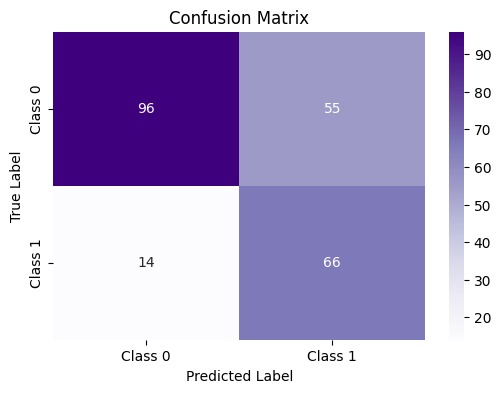

In [74]:
# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [75]:
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.64      0.74       151
           1       0.55      0.82      0.66        80

    accuracy                           0.70       231
   macro avg       0.71      0.73      0.70       231
weighted avg       0.76      0.70      0.71       231



AUC: 0.7303807947019867


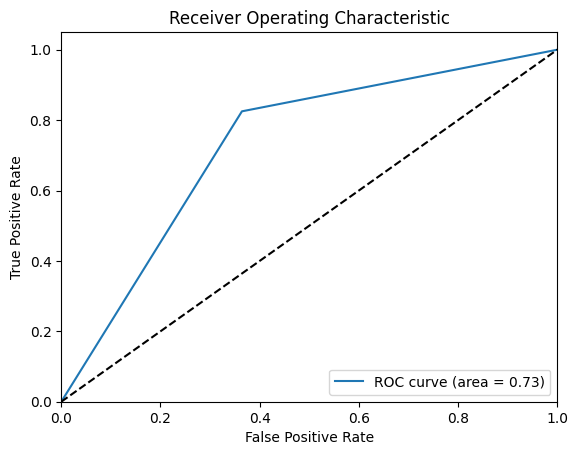

In [76]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC value
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Performing cross-validation
scores = cross_val_score(knn, train_features, train_labels, cv=5)

# Calculation of the average of the accuracy scores
mean_accuracy = scores.mean()

# Printing the accuracy scores obtained for each fold
print("Accuracy scores for each fold:", scores)

# Printing mean accuracy of kv
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.73255814 0.80232558 0.73255814 0.77906977 0.8       ]
Mean accuracy: 0.7693023255813953
